<a href="https://colab.research.google.com/github/Amehi/3160src/blob/main/assignment_1_Amehi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (CSC3160/MDS6002)

This is an instruction and template for the first assignment. In this assignment, you will utilize various tools to extract spectrogram features, perform speech recognition, generate speech, and align speech. Additionally, you will summarize the provided research paper. 

Should you have any inquiries, please feel free to ask in the GitHub discussion forum found at: https://github.com/orgs/SLPcourse/discussions/categories/assignments.

Please follow the template to finish your assignment and submit in GitHub.

## Example: Extracting spectrogram

In [ ]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


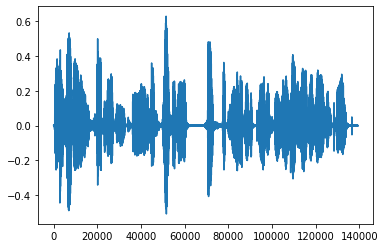

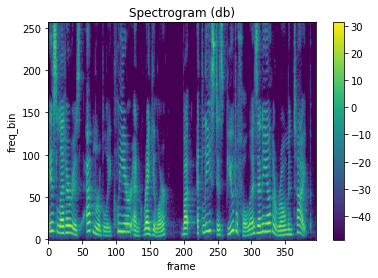

In [ ]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa
import torch

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform) 

# create an object that extract spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [10 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram (80 Mel Filter Banks) with 5ms, 10ms, 15ms frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram
* Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift



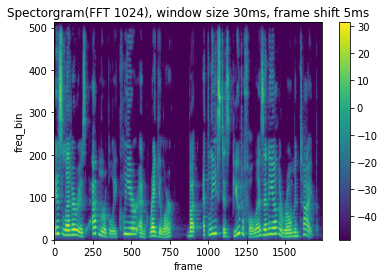

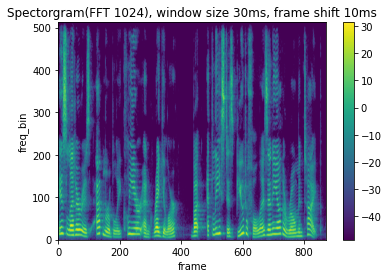

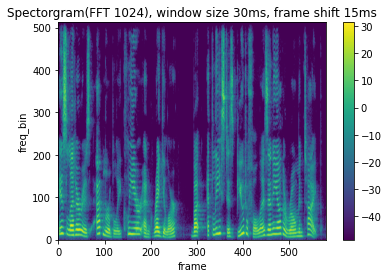

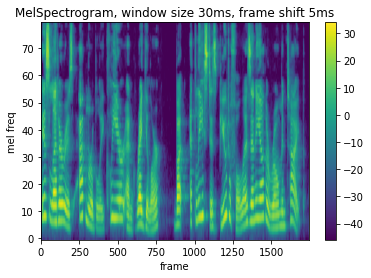

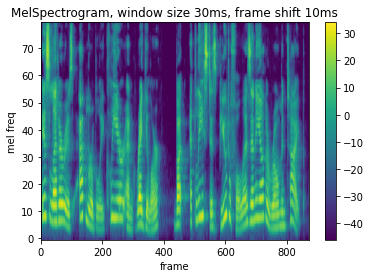

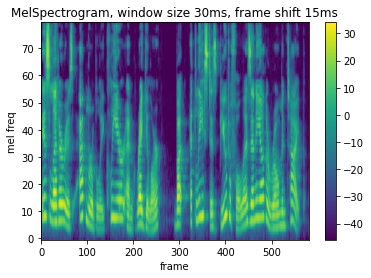

/usr/local/lib/python3.8/dist-packages/torchaudio/functional/functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (512) may be set too high. Or, the value for `n_freqs` (241) may be set too low.
  warnings.warn(


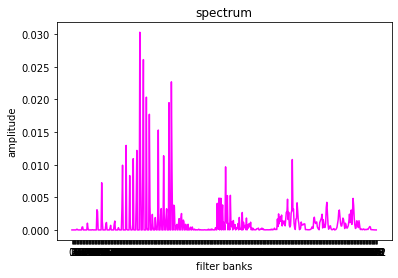

In [ ]:
import torch
import torchaudio
import requests
import torchaudio.transforms as T
import matplotlib.pyplot as plt

target_sample_rate = 16000
n_fft = 1024

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)
def mix_down_if_necessary(waveform):
  if waveform.shape[0] > 1:
    waveform = torch.mean(waveform, dim=0, keepdim=True)
  return waveform
  
def resample_if_necessary(waveform, sample_rate):
  if sample_rate != target_sample_rate:
    resampler = torchaudio.transforms.Resample(sample_rate, target_sample_rate)
    waveform = resampler(waveform)
  return waveform

#save the audio
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
r = requests.get(url)
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)
#load audio
waveform, sample_rate = torchaudio.load(filename)

#plot spectorgram (FFT 1024) window length 30ms, frame shift 5ms
spec_trans = T.Spectrogram(
    n_fft=1024, 
    power=2,
    win_length = 480,
    hop_length = 80
)
spec1 = spec_trans(waveform)
plot_spectrogram(spec1[0], title = "Spectorgram(FFT 1024), window size 30ms, frame shift 5ms")

#plot spectorgram (FFT 1024) window length 30ms, frame shift 10ms
spec_trans = T.Spectrogram(
    n_fft=1024, 
    power=2,
    win_length = 480,
    hop_length = 160
)
spec2 = spec_trans(waveform)
plot_spectrogram(spec2[0], title = "Spectorgram(FFT 1024), window size 30ms, frame shift 10ms")

#plot spectorgram (FFT 1024) window length 30ms, frame shift 15ms
spec_trans = T.Spectrogram(
    n_fft=1024, 
    power=2,
    win_length = 480,
    hop_length = 240
)
spec3 = spec_trans(waveform)
plot_spectrogram(spec3[0], title = "Spectorgram(FFT 1024), window size 30ms, frame shift 15ms")

#plot mel spectrogram windowsize=30ms, frameshift=5ms
mel_spectrogram_5 = torchaudio.transforms.MelSpectrogram(
    sample_rate = 16000,
    n_fft = 1024,
    win_length = 480,
    hop_length = 80,
    n_mels = 80
)

ms_5 = mel_spectrogram_5(waveform)
plot_spectrogram(ms_5[0], title="MelSpectrogram, window size 30ms, frame shift 5ms", ylabel="mel freq")

#plot mel spectrogram windowsize=30ms, frameshift=10ms
mel_spectrogram_10 = torchaudio.transforms.MelSpectrogram(
    sample_rate = 16000,
    n_fft = 1024,
    win_length = 480,
    hop_length = 160,
    n_mels = 80
)

ms_10 = mel_spectrogram_10(waveform)
plot_spectrogram(ms_10[0], title="MelSpectrogram, window size 30ms, frame shift 10ms", ylabel="mel freq")

#plot mel spectrogram windowsize=30ms, frameshift=15ms
mel_spectrogram_15 = torchaudio.transforms.MelSpectrogram(
    sample_rate = 16000,
    n_fft = 1024,
    win_length = 480,
    hop_length = 240,
    n_mels = 80
)

ms_15 = mel_spectrogram_15(waveform)
plot_spectrogram(ms_15[0], title="MelSpectrogram, window size 30ms, frame shift 15ms", ylabel="mel freq")

#plot 150th frame of the 512-dimensional spectrogram with 10 ms frameshift
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate = 16000,
    n_fft = 480,
    hop_length = 240,
    n_mels = 512
)
ms = mel_spectrogram(waveform)
data = ms[0][:,149]
plt.plot(data, color='magenta',mfc='pink' )
plt.xticks(range(0,len(data)+1, 1))
plt.ylabel('amplitude') 
plt.xlabel('filter banks')
plt.title("spectrum") 
plt.show()

## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to 16 kHz and 16-bit depth.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

In [ ]:
# Write your implementation here
import requests
import torchaudio
import IPython

#load audio
my_url = "https://raw.githubusercontent.com/Amehi/3160src/main/3160A1task2.wav"
my_r = requests.get(my_url)
my_filename = "Amehi1.wav"
with open(my_filename, 'wb') as f:
    f.write(my_r.content)
my_waveform, my_sample_rate = torchaudio.load(my_filename)

print(torchaudio.info(my_filename)) #the recording is already 16-bit depth

# create an object that resamples a waveform
my_resampler = torchaudio.transforms.Resample(my_sample_rate, 16000, dtype=my_waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
my_resampled_waveform = my_resampler(my_waveform)
#display result
IPython.display.display(IPython.display.Audio(my_waveform[0:1].cpu(), rate=my_sample_rate))
IPython.display.display(IPython.display.Audio(my_resampled_waveform[0:1].cpu(), rate=16000))

AudioMetaData(sample_rate=48000, num_frames=436224, num_channels=1, bits_per_sample=16, encoding=PCM_S)


## (3) [10 marks] Speech recognition with Whisper model

[Whisper](https://github.com/openai/whisper) is a general-purpose speech recognition model released by OpenAI. Your task is to use the whisper model to perform speech recognition on the provided audio sample and your own recording. 

In [ ]:
!pip install -U openai-whisper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.6 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230124-py3-none-any.whl size=1179329 sha256=3c05fe9f31ae8f750fe4367c0f6cfa25e4fb80bee7b78f40edbde0353a13f89d
  Stored in directory: /root/.cache/pip/wheels/48/c2/dd/8639c7cda1e20412e499ab65e5003d8863ef8622792ea26446
Successfully built openai-whisper


In [ ]:
# Write your implementation here

import whisper

#--------------------------sample--------------------------------
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
r = requests.get(url)
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

model = whisper.load_model("base")
result = model.transcribe("LJ001-0048.wav")
print("Sample: " + result["text"])

#---------------------my recording----------------------------------
my_url = "https://raw.githubusercontent.com/Amehi/3160src/main/3160A1task2.wav"
my_r = requests.get(my_url)
my_filename = "Amehi1.wav"
with open(my_filename, 'wb') as f:
    f.write(my_r.content)
model = whisper.load_model("base")
result = model.transcribe("Amehi1.wav")
print("My Recording: " + result["text"])

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 81.9MiB/s]
/usr/local/lib/python3.8/dist-packages/whisper/transcribe.py:78: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Sample:  His letter is admirably clear and regular, but at least as beautiful as any other Roman type.


/usr/local/lib/python3.8/dist-packages/whisper/transcribe.py:78: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


My Recording:  His letter is the maribolic clear and regular, but at least as beautiful as any other Roman type.


## (4) [10 marks] Text-to-speech synthesis

Text-to-speech synthesis is to generate speech for a given text. Torchaudio has provided pretrained [Tacotron2-based model](https://pytorch.org/audio/stable/generated/torchaudio.pipelines.Tacotron2TTSBundle.html#torchaudio.pipelines.Tacotron2TTSBundle). Your task is to 
* Use the pretrained bundle to generate speech using the Character-based TTS pipeline with Tacotron2 and WaveRNN.
* Use the pretrained bundle to generate speech using the Phoneme-based TTS pipeline with Tacotron2 and WaveRNN.
* Discuss the difference between two audio samples from the above two pipelines.

The script you need to use for the text-to-speech synthesis task:

`I am <YOUR_NAME>, my student ID is <YOUR_STUDENT_ID>. I am taking the [CSC3160/MDS6002] course this semester.`


***Note: Replace `<YOUR_NAME>` and `<YOUR_STUDENT_ID>` with your real name and your student ID, respectively.***

In [ ]:
!pip3 install deep_phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for deep_phonemizer: filename=deep_phonemizer-0.0.17-py3-none-any.whl size=29727 sha256=442c865531acb4a316ea1168cc0b8273b75717063bb737c072c36317e00ed940
  Stored in directory: /root/.cache/pip/wheels/e4/cc/ce/e329d15bd6374b9bcdc717d00c4d0f934c3ca2091ebf0a1968
Successfully built deep_phonemizer


In [ ]:
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


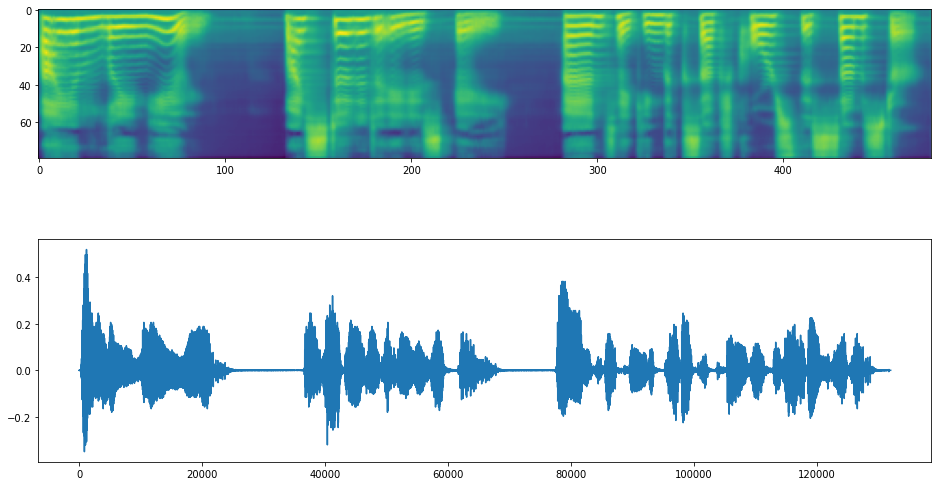

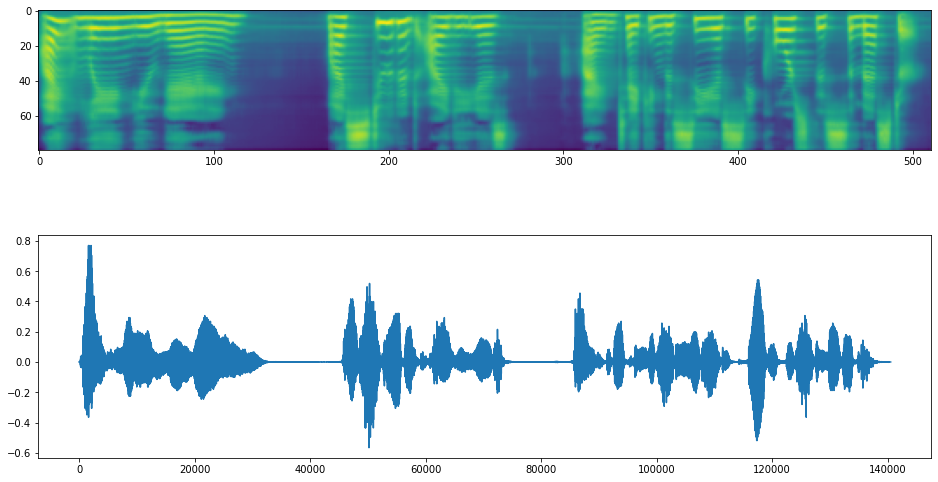

In [ ]:
# Write your implementation here
import torch
import torchaudio
import matplotlib
import matplotlib.pyplot as plt
import IPython

text = "I am Liang Yuyang, my student ID is 119010174. I am taking the CSC3160 course this semester."
device = 'cpu'

#---------------------Character-based pipeline---------------------------
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

with torch.inference_mode(): #show process
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms_char, lengths = vocoder(spec, spec_lengths)

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach())
ax2.plot(waveforms_char[0].cpu().detach())
IPython.display.display(IPython.display.Audio(waveforms_char[0:1].cpu(), rate=vocoder.sample_rate))

#---------------------Phoneme-based pipeline-------------------------------
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)


with torch.inference_mode(): #show process
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms_phon, lengths = vocoder(spec, spec_lengths)

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach())
ax2.plot(waveforms_phon[0].cpu().detach())
IPython.display.display(IPython.display.Audio(waveforms_phon[0:1].cpu(), rate=vocoder.sample_rate))

# Difference between two audio samples
- Genreally speaking, the audio generated by Phoneme-based pipeline is better than the audio generated by Character-based pipeline.To be more specific, the audio generated by Phoneme-based pipeline has better(more natural) intonation and pronunciation. 
- The differnece between the two pipelines is that they use two different ways to encode the text into sequence. Character-based encoding maps the each character of the input text into the index of the corresponding symbol in the predefined table. Phoneme-based encoding is similar to character-based encoding, but it uses a symbol table based on phonemes and a G2P (Grapheme-to-Phoneme) model.

## (5) [10 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html). 

118.34823616405734
66.35607374050625


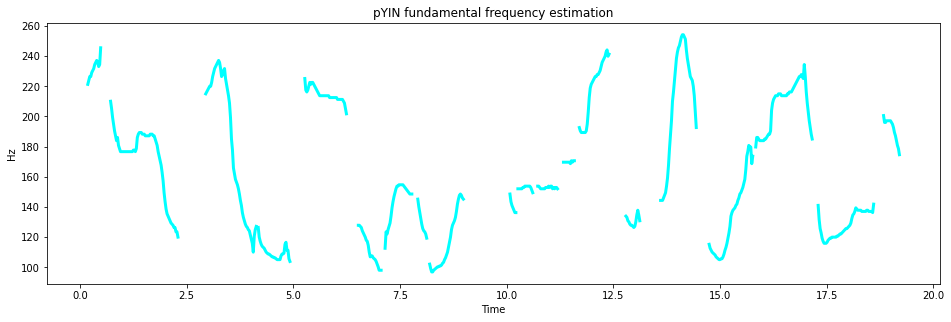

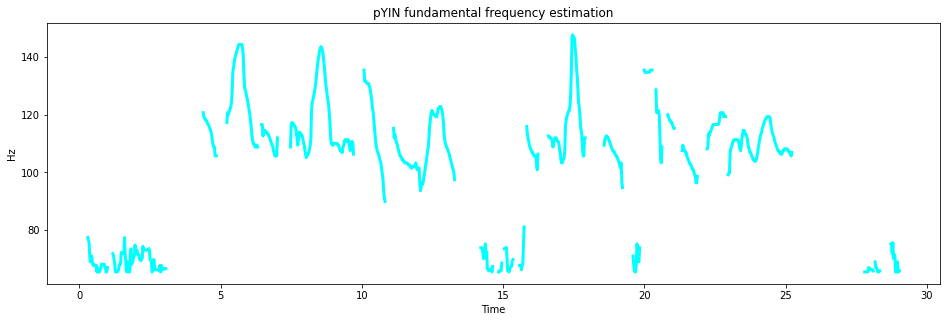

In [ ]:
# Write your implementation here
import librosa
import matplotlib.pyplot as plt
import numpy as np

#------------------------------sample---------------------------------
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
r = requests.get(url)
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

y, sr = librosa.load("LJ001-0048.wav")
#calculate f0
f0, voiced_flag, voiced_probs = librosa.pyin(y, librosa.note_to_hz('C2'), librosa.note_to_hz('C7'), 16000, hop_length = 160)
#show result
times = librosa.times_like(f0)

fig, ax = plt.subplots()
ax.set(title='pYIN fundamental frequency estimation')
ax.set_ylabel("Hz")
ax.set_xlabel("Time")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)

f0 = np.nan_to_num(f0)
f0_mean = np.mean(f0)
print(f0_mean)

#--------------------------my recording-----------------------------------
my_url = "https://raw.githubusercontent.com/Amehi/3160src/main/3160A1task2.wav"
my_r = requests.get(my_url)
my_filename = "Amehi1.wav"
with open(my_filename, 'wb') as f:
  f.write(my_r.content)
my_audio, my_sr = librosa.load("Amehi1.wav")
#calculate f0
my_f0, my_voiced_flag, my_voiced_probs = librosa.pyin(my_audio, librosa.note_to_hz('C2'), librosa.note_to_hz('C7'), 16000, hop_length = 160)
#show result
my_times = librosa.times_like(my_f0)\

my_fig, my_ax = plt.subplots()
my_ax.set(title='pYIN fundamental frequency estimation')
my_ax.set_ylabel("Hz")
my_ax.set_xlabel("Time")
my_ax.plot(my_times, my_f0, label='f0', color='cyan', linewidth=3)

my_f0 = np.nan_to_num(my_f0)
my_f0_mean = np.mean(my_f0)
print(my_f0_mean)

## (6) [20 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using 80-dimensional mel-spectrogram.

Here are your tasks:
* Visualize the alignment 80-dimensional mel-spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [ ]:
!pip install fastdtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Note:
- Here I did not use the tool provided above, I refer to this [method](https://github.com/kamperh/lecture_dtw_notebook/blob/main/dtw.ipynb).
This method does not align the waveform(list of numbers) but the mel spectrogram(list of vetors), and I think this strategy is better. In this case, the cosine distance is used instead of euclidean distence.

- I also plot the path obtained by the provided FastDTW tool at the end of this section for comparision.

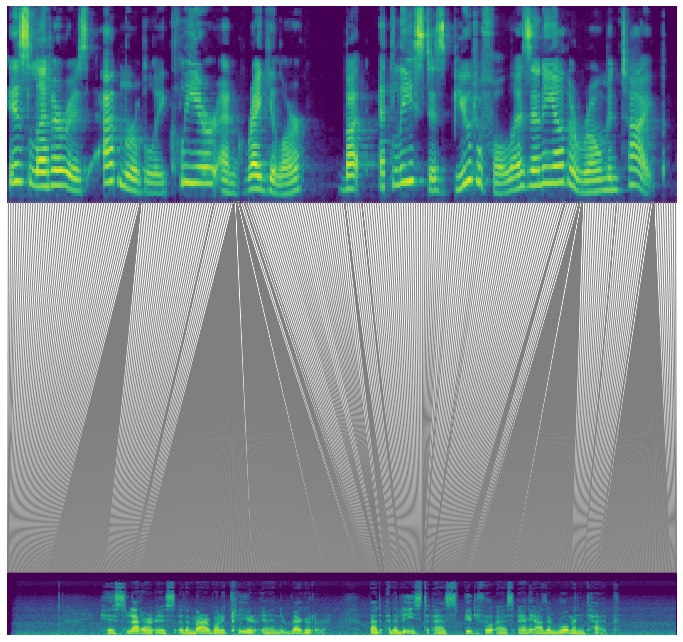

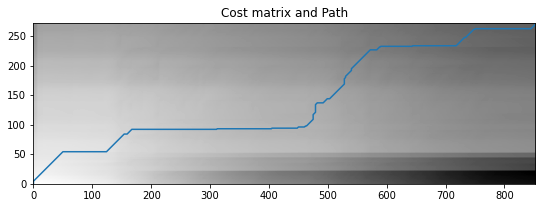

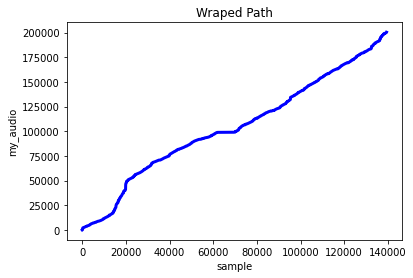

In [39]:
# Write your implementation here
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import requests
import librosa
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import scipy.spatial.distance as dist


def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

#load audio
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
r = requests.get(url)
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)
sample, sr_sample = torchaudio.load("LJ001-0048.wav")

my_url = "https://raw.githubusercontent.com/Amehi/3160src/main/3160A1task2.wav"
my_r = requests.get(my_url)
my_filename = "Amehi1.wav"
with open(my_filename, 'wb') as f:
  f.write(my_r.content)
my_audio, my_sr = torchaudio.load("Amehi1.wav")


# align mel spectrogram
mel_spectrogram = torchaudio.transforms.MelSpectrogram(n_fft = 1024, n_mels = 80)

ms_sample = mel_spectrogram(sample)
ms_mine = mel_spectrogram(my_audio)

log_mel_spec_x = librosa.power_to_db(ms_sample[0])
log_mel_spec_y = librosa.power_to_db(ms_mine[0])

x_seq = log_mel_spec_x.T
y_seq = log_mel_spec_y.T

dist_mat = dist.cdist(x_seq, y_seq, "cosine")
path, cost_mat = dp(dist_mat)

fig = plt.figure(figsize=(12, 13))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(313)

ax1.imshow(log_mel_spec_x, origin="lower", interpolation="nearest") # above one is the sample
ax2.imshow(log_mel_spec_y, origin="lower", interpolation="nearest") # bottom one is my recording
ax1.axis("off")
ax2.axis("off")

for x_i, y_j in path:
    con = ConnectionPatch(
        xyA=(x_i, 0), xyB=(y_j, log_mel_spec_y.shape[0] - 1), coordsA="data", coordsB="data",
        axesA=ax1, axesB=ax2, color="C7"
        )
    ax2.add_artist(con)

#plot the path
plt.figure(figsize=(9, 10))
plt.title("Cost matrix and Path")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

#use the provided FastDTW to get warped path
sample, sr_sample = librosa.load("LJ001-0048.wav")
my_audio, my_sr = librosa.load("Amehi1.wav")
distance, path = fastdtw(sample, my_audio, dist=euclidean)
path_x = [p[0] for p in path]
path_y = [p[1] for p in path]
fig, axs = plt.subplots()
axs.set_title("Wraped Path")
axs.set_ylabel("my_audio")
axs.set_xlabel("sample")
plt.plot(path_x, path_y, color='blue', linewidth=3)
plt.show()

## (7) [30 marks] Paper reading

Please read the paper provided below and summarize its key points in 200-300 words. Your summary should include
* a description of the problem being addressed
* the paper's main contributions
* the metrics used for evaluation, and the experimental results
* the findings from the paper

[*PitchNet: Unsupervised Singing Voice Conversion with Pitch Adversarial Network*](https://arxiv.org/abs/1912.01852)

**Note: longer than 300 words may have negative impact.**

```
# Write your summary here (200-300 words)
```
# Problem Addressed
The [old method](https://arxiv.org/abs/1904.06590) to achieve **singing voice conversion**( convert a singer’s voice to another one’s voice without changing singing content.) cannot predict the correst ptich. This paper proposes a new SVC method, called **PitchNet**, based on the old approach. Accoring to the authors, the key feature of PitchNet is a new added adversarially trained pitch regression network.

# Main Contribution
The paper proposes a novel novel unsupe SVC method, which has better performance compared with old methods.

# Evaluaiton Methods and Results
## automatic evaluation score
- Use pitch tracker of librosa package to extract pitch information of the input and output audio.Compare them with the normalized cross correlation (NCC).
- PitchNet performed better both on conversion and reconstruction (has higher score) compared with USVC they implemented.

## human evaluation score
- Use Mean Opinion Score(MOS) to quantify the quality of converted audio. Naturalness and similarity are evaluated (with a score 1-5).
- The socre of naturalness and similarity of PitchNet are both higher than original USVC and the USVC they implemented.

## influence of input pitch
- The input pitch was multiplied by 0.7, 1.0 and 1.3 respectively. And the output pitch was also extracted by the pitch tracker of the librosa package.
- The output pitch changes significantly along with the input pitch

# Findings 
With PitchNet, the pitch of converted singing can be easily controlled during generation by changing the levels of extracted pitch before passing it to the decoder network.
